## Tutorial 8, Question 2

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

## Set random seed and initialize hyper-parameters

In [2]:
# Set random seed for reproducibility
seed = 10
np.random.seed(seed)
torch.manual_seed(seed)

In [3]:
# Initialize hyper-parameters
n_in = 3
n_hidden = 5
n_out = 2
n_steps = 100
n_seqs = 8
n_iters = 10000
lr = 0.01

## Generate training data

In [4]:
x_train = np.random.rand(n_seqs, n_steps, n_in)
y_train = np.zeros([n_seqs, n_steps, n_out])

y_train[:, 1:, 0] = 5 * x_train[:, 1:, 0] - 0.2 * x_train[:, :-1, 2]
y_train[:, 3:, 1] = 25 * x_train[:, 2:-1, 1] * x_train[:, :-3, 2]
y_train += 0.1 * np.random.randn(n_seqs, n_steps, n_out)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

## Define the RNN

In [5]:
class RNN(nn.Module):
    def __init__(self, n_in, n_hidden, n_out):
        super(RNN, self).__init__()

        self.rnn = nn.RNN(n_in, n_hidden, batch_first=True)
        self.fc = nn.Linear(n_hidden, n_out)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), n_hidden)
        out, _ = self.rnn(x, h0)
        out = self.fc(out)
        return out

## Training

In [6]:
# Initialize the model, optimizer and loss for training
model = RNN(n_in, n_hidden, n_out)
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()

# Training
print('Training starts...')
losses = []
for epoch in range(n_iters):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{n_iters}], Loss: {loss.item():.4f}')
print('Training ended...')

Training starts...
Epoch [1/10000], Loss: 42.8072
Epoch [101/10000], Loss: 18.1759
Epoch [201/10000], Loss: 17.8112
Epoch [301/10000], Loss: 17.6864
Epoch [401/10000], Loss: 17.3070
Epoch [501/10000], Loss: 15.6155
Epoch [601/10000], Loss: 11.5717
Epoch [701/10000], Loss: 10.3076
Epoch [801/10000], Loss: 8.8082
Epoch [901/10000], Loss: 5.1595
Epoch [1001/10000], Loss: 3.8364
Epoch [1101/10000], Loss: 3.0290
Epoch [1201/10000], Loss: 2.5190
Epoch [1301/10000], Loss: 2.1340
Epoch [1401/10000], Loss: 1.9768
Epoch [1501/10000], Loss: 1.8389
Epoch [1601/10000], Loss: 1.7570
Epoch [1701/10000], Loss: 1.8486
Epoch [1801/10000], Loss: 1.7459
Epoch [1901/10000], Loss: 1.6586
Epoch [2001/10000], Loss: 1.6105
Epoch [2101/10000], Loss: 1.5928
Epoch [2201/10000], Loss: 1.5638
Epoch [2301/10000], Loss: 1.5809
Epoch [2401/10000], Loss: 1.5691
Epoch [2501/10000], Loss: 1.5678
Epoch [2601/10000], Loss: 1.5631
Epoch [2701/10000], Loss: 1.4984
Epoch [2801/10000], Loss: 1.5056
Epoch [2901/10000], Loss: 1.

## Visualization

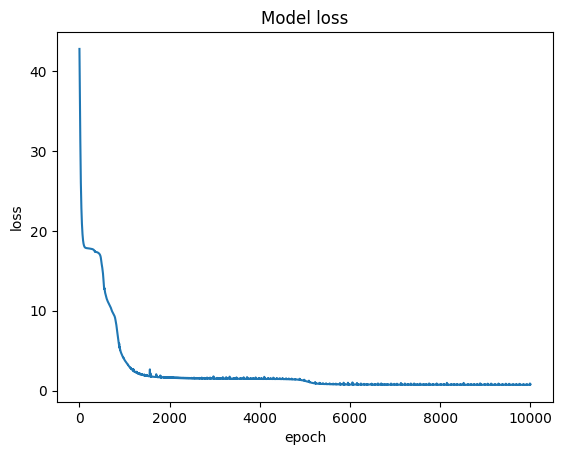

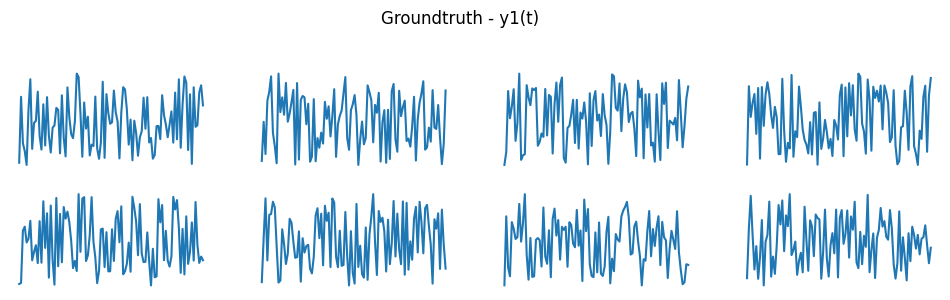

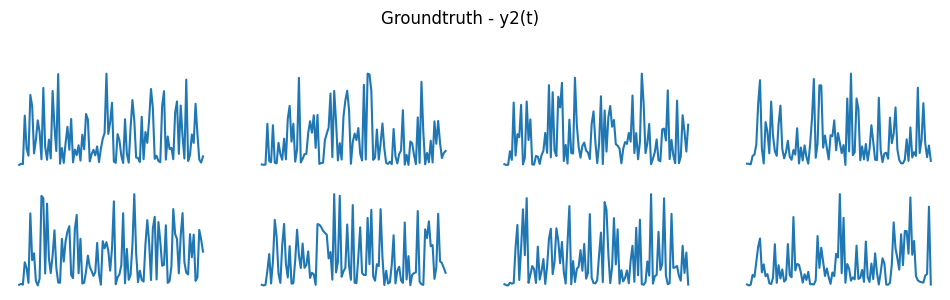

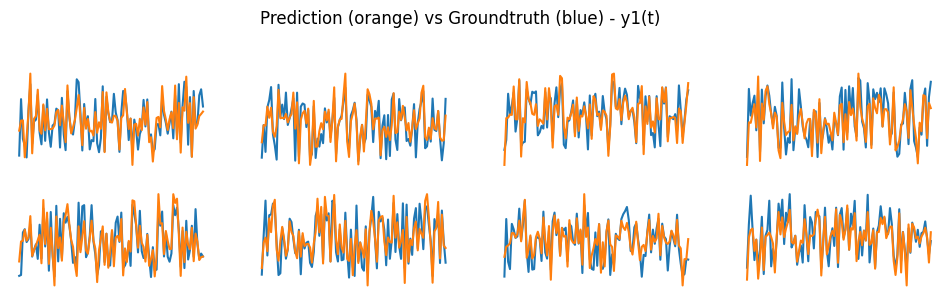

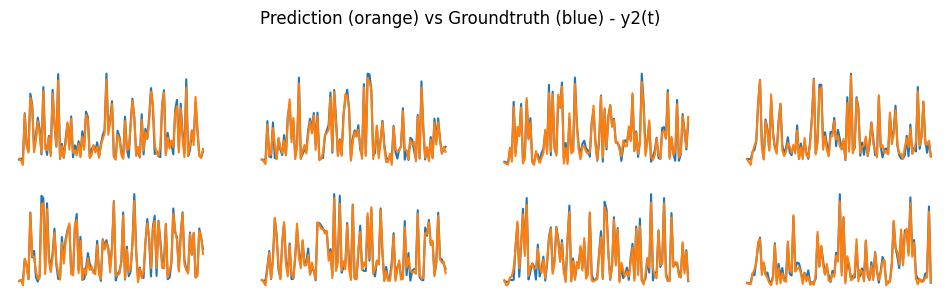

In [7]:
# Plot the loss curve
plt.plot(losses)
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Pass the training data to the trained model
y_pred = model(x_train).detach().numpy()

# Plot Groundtruth - y1(t)
plt.figure(figsize=(12, 6))
for i in range(8):
    ax = plt.subplot(4, 4, i + 1)
    plt.axis('off')
    ax.plot(range(n_steps), y_train[i, :, 0].numpy())
plt.suptitle('Groundtruth - y1(t)')
plt.show()

# Plot Groundtruth - y2(t)
plt.figure(figsize=(12, 6))
for i in range(8):
    ax = plt.subplot(4, 4, i + 1)
    plt.axis('off')
    ax.plot(range(n_steps), y_train[i, :, 1].numpy())
plt.suptitle('Groundtruth - y2(t)')
plt.show()

# Plot Prediction vs Groundtruth - y1(t)
plt.figure(figsize=(12, 6))
for i in range(8):
    ax = plt.subplot(4, 4, i + 1)
    plt.axis('off')
    ax.plot(range(n_steps), y_train[i, :, 0].numpy())
    ax.plot(range(n_steps), y_pred[i, :, 0])
plt.suptitle('Prediction (orange) vs Groundtruth (blue) - y1(t)')
plt.show()

# Plot Prediction vs Groundtruth - y2(t)
plt.figure(figsize=(12, 6))
for i in range(8):
    ax = plt.subplot(4, 4, i + 1)
    plt.axis('off')
    ax.plot(range(n_steps), y_train[i, :, 1].numpy())
    ax.plot(range(n_steps), y_pred[i, :, 1])
plt.suptitle('Prediction (orange) vs Groundtruth (blue) - y2(t)')
plt.show()
